# Proyek Akhir : Klasifikasi Gambar
Belajar Machine Learning untuk Pemula by Dicoding Indonesia
* Nama  : Angger Binuko Paksi
* Email : angger.binuko@gmail.com

# Step 1: Install wget (if not installed)

In [5]:
!pip install wget

# Step 2: Import Libraries

In [6]:
import os
import wget
import zipfile
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
import time

# Step 3: Download dataset

In [9]:
url = 'https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip'
dataset_path = 'rockpaperscissors.zip'
wget.download(url, dataset_path)

'rockpaperscissors.zip'

# Step 4: Extract dataset

In [10]:
with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
    zip_ref.extractall('dataset')

# Step 5: Define directories

In [11]:
base_dir = 'dataset/rockpaperscissors/rps-cv-images'
train_dir = os.path.join(base_dir)

# Step 6: Preprocess data with ImageDataGenerator and augmentation


In [12]:
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.4,  # 40% untuk validasi
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_data = data_gen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_data = data_gen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)



Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


# Step 7: Load the MobileNetV2 model


In [13]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
base_model.trainable = False  # Freeze the base model

<ipython-input-13-d460463e6a3c>:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(150, 150, 3))


# Step 8: Build the model


In [14]:
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
predictions = tf.keras.layers.Dense(3, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Step 9: Compile the model


In [15]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Step 10: Define Callbacks


In [16]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

model_checkpoint = ModelCheckpoint(
    'best_model.keras',  # Ganti .h5 menjadi .keras
    monitor='val_accuracy',
    save_best_only=True,
    mode='max'
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    min_lr=1e-6
)

# Step 11: Train the model


In [17]:
start_time = time.time()  # Catat waktu mulai

history = model.fit(
    train_data,
    steps_per_epoch=len(train_data),
    validation_data=val_data,
    epochs=20,  # Tingkatkan epoch
    verbose=1,
    callbacks=[early_stopping, model_checkpoint, reduce_lr]
)

end_time = time.time()  # Catat waktu selesai
training_time = end_time - start_time  # Hitung waktu pelatihan

# Tampilkan waktu pelatihan model
print(f'Time taken to train the model: {training_time:.2f} seconds')

Epoch 1/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.7753 - loss: 0.5652 - val_accuracy: 0.9382 - val_loss: 0.1685 - learning_rate: 0.0010
Epoch 2/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 21s 499ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9439 - val_loss: 0.1786 - learning_rate: 0.0010
Epoch 3/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.9496 - loss: 0.1125 - val_accuracy: 0.9691 - val_loss: 0.0789 - learning_rate: 0.0010
Epoch 4/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 21s 498ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9703 - val_loss: 0.1021 - learning_rate: 0.0010
Epoch 5/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - accuracy: 0.9703 - loss: 0.0953 - val_accuracy: 0.9703 - val_loss: 0.0882 - learning_rate: 0.0010
Epoch 6/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 41s 984ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9714 - val_loss: 0.0825 - learning_rate: 0.0010
Epoch 7/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.981

# Step 12: Evaluate the model


In [18]:
val_loss, val_accuracy = model.evaluate(val_data)
print(f'Validation accuracy: {val_accuracy * 100:.2f}%')

28/28 ━━━━━━━━━━━━━━━━━━━━ 20s 711ms/step - accuracy: 0.9855 - loss: 0.0486
Validation accuracy: 98.40%


# Step 13: Upload a new image for prediction


Saving Screen Shot 2024-10-10 at 16.16.04.png to Screen Shot 2024-10-10 at 16.16.04.png


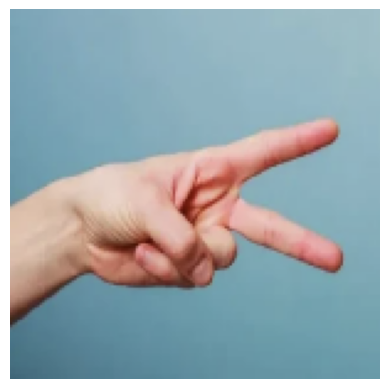

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
The uploaded image is predicted as: Scissors
Prediction confidence: 99.34%


In [20]:
uploaded = files.upload()

for file_name in uploaded.keys():
    # Load the uploaded image
    img_path = file_name
    img = image.load_img(img_path, target_size=(150, 150))

    # Display the uploaded image
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    # Preprocess the image
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalization

    # Make predictions
    prediction = model.predict(img_array)
    class_indices = ['Rock', 'Paper', 'Scissors']
    predicted_class = class_indices[np.argmax(prediction)]
    confidence = np.max(prediction) * 100  # Confidence score in percentage

    # Display the prediction and accuracy
    print(f'The uploaded image is predicted as: {predicted_class}')
    print(f'Prediction confidence: {confidence:.2f}%')

